In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
a = np.array([1,2,3,4,5,5,9])
np.mean(a)

4.142857142857143

In [4]:
from scipy import stats

In [5]:
b = [1,2,3,4,5,5,9]
mean = stats.trim_mean(b,0.1)
mean

4.142857142857143

#### Dimensionality Reduction Algorithms include PCA and LDA

Dimensionality Reduction (DR) is an unsupervised learning technique that transforms a dataset into a smaller set of features while retaining as much variability as possible. It leverages feature extraction to address the "curse of dimensionality," a common problem where too many features can lead to overfitting and reduced model performance. In PCA, you take the original data and for that data, calculate covariance matrix. This covariance matrix will help you determie 'Eigen vectors' for the given data and drop all your data points on Eigen vectors.

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [41]:
df = pd.read_csv(url,names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
X = df.drop(columns = ['target'], axis = 1)

In [43]:
X.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y = df['target']

In [45]:
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: target, dtype: object

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Pipeline is a sub-routine or sub-procedure call. it requires you to pass the data in a tuple format for it to pack and unpack later.

In [47]:
pca_pipeline = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=2))])

In [48]:
x_pca = pca_pipeline.fit_transform(X)

In [49]:
scaled_x = pd.DataFrame(data = x_pca, columns = ['PC1', 'PC2'])
scaled_x = pd.concat([scaled_x, df[['target']]], axis =1) # In pandas 'merge' and 'join' is used for columns and 'concat' for rows.
scaled_x

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [50]:
# Headsup: PCA is rarely used in production  because companies have high compute resource and power. As such, rather than
# Doing away with some features they spend more on other resources to keep the features intact and retain as much information as possible.
# If feature numbers are more, it may lead to overfitting but the same problem can be solved with the help of the neural networks.
# Neural Networks has an upper hand over PCA technique as it is dynamic in nature. In PCA you need to do feature engineering but in 
# Neural networks just pass the number of hidden layers, Weights and Biases in NN will automatically train parameters.
# PCA and other Machine Learning algorithms are used for handling smaller data. For larger Data we switch to Deep Learning.
# records > 15,00,000 go with Deep Learning.


In [51]:
df['target'].value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [52]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
plt.figure(figsize = (6,4))
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'green', 'blue']

<Figure size 600x400 with 0 Axes>

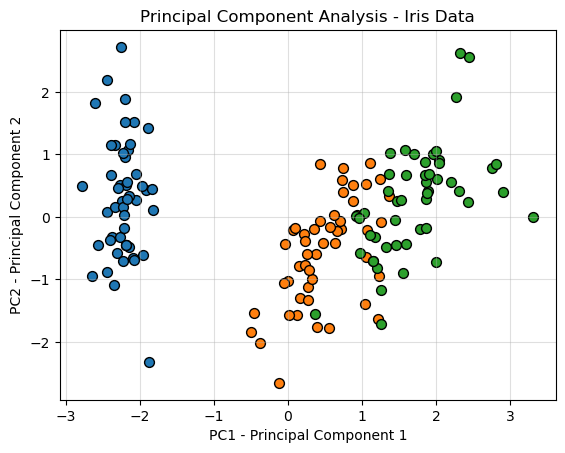

In [62]:
for target, color in zip(targets, colors):
    indices = scaled_x['target']== target
    plt.scatter(scaled_x.loc[indices, 'PC1'], scaled_x.loc[indices, 'PC2'], s=50, edgecolor = 'black')

plt.xlabel('PC1 - Principal Component 1')
plt.ylabel('PC2 - Principal Component 2')
plt.title('Principal Component Analysis - Iris Data')
plt.grid(alpha = 0.4)
plt.show()

In [64]:
print(f'Explained Variance Ratio:', pca_pipeline.named_steps['pca'].explained_variance_ratio_)

Explained Variance Ratio: [0.72770452 0.23030523]


In [68]:
arr = [0.72770452, 0.23030523]

In [70]:
sum(arr)

0.95800975

In [71]:
## Very Important question from interview perspective--> Explained Variance Ratio
# the number 0.95800975 indicates that following dimensionality reduction approx. 96 percent of the data's variability 
# is captured by 2 principal components combined. 
# PC1 independently retains 72.770452% and PC2 - approx 24% of the data variability. This also helps us find max variability 
# on an axis
# Explained Variance Ratio also helps us understand 'Feature Partitioning' in a way.

# Why Data variability is important? 
# Ans--> If the data exhibits the same repeating characteristics, the ML algorithm won't be capable of predicting anything new 
# in real-world scenarios. For effective learning, 
# the data must contain sufficient patterns and variations to capture diverse possibilities.

# Consider a scenario where a model is trained on data following a specific trend. 
# Suddenly, the trend shifts, causing the model's performance to decline. 
# To evaluate this, we calculate a metric called 'Data Drift,' which incorporates a concept known as the 'Population Stability Index.' 
# This metric helps identify whether a drift has occurred in your data. 
# If a drift is detected, it’s essential to retrain the model using the latest dataset to achieve accurate and reliable results.

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42) # Random_state prevents random shuffling

#### Trying with Logistic Regression

In [95]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 2)),
    ('lr', LogisticRegression(max_iter = 100, C=1.0))])

lr_scores = cross_val_score(lr_pipeline, x_train, y_train, cv = 5)
print(f"LR Cross Validation Score: {lr_scores}")
print(f"LR Cross Validation Score Mean: {np.mean(lr_scores)}")

lr_pipeline.fit(x_train, y_train)
lr_pred = lr_pipeline.predict(x_test)
print(f" LR Classification Report: {classification_report(y_test, lr_pred)}")
         

LR Cross Validation Score: [1.         0.9047619  0.80952381 1.         0.80952381]
LR Cross Validation Score Mean: 0.9047619047619048
 LR Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.80      0.92      0.86        13

       accuracy                           0.91        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.92      0.91      0.91        45



In [ ]:
# Note Akaike Information Criteria and Bayesian Infrmation Criteria are useful during Class Imbalance(Remember SMOTE)
# To evaluate the performance of your Random Forest (RF) model, ensure one part outweighs the other. For instance, by default, 
# A Random Forest typically uses 100 trees. If 50 trees output 0 and 50 output 1, it results in a tie. 
# In such cases, an additional tree is introduced to break the tie and tip the scale in favor of one outcome. 
# This process is known as a 'Tie Breaker.

#### Trying with Random Forest

In [102]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('rf', RandomForestClassifier(n_estimators = 120, random_state = 42))])

rf_scores = cross_val_score(rf_pipeline, x_train, y_train, cv = 5)
print(f" Random Forest Cross Val Score: {rf_scores}")
print(f"Random Forest Cross Val Score Mean: {np.mean(rf_scores)}")

rf_pipeline.fit(x_train, y_train)
rf_pred = rf_pipeline.predict(x_test)
print(f" Random Forest Classification Report:{classification_report(y_test, rf_pred)}")

 Random Forest Cross Val Score: [0.95238095 0.9047619  0.80952381 0.95238095 0.80952381]
Random Forest Cross Val Score Mean: 0.8857142857142858
 Random Forest Classification Report:                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
# Logistic Regression models come under a class called Generalized Linear Models hence 